In [ ]:
# libraries
!pip install xlrd
import os
import pandas as pd
import openpyxl
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leer el archivo

file_path = '/content/drive/MyDrive/Colab_Notebooks/portfolio_oncti/ReporteCompleto_2024-09-23.xlsx'
df = pd.read_excel(file_path)

df

,Nro,Nacionalidad,Cedula de identidad,Primer Nombre,Segundo Nombre,Primer Apellido,Segundo Apellido,Edad,Sexo,Estado Civil,...,Subarea,Curso Capacitacion,Titulo Obtenido,Horas Academicas,Trabaja,Tipo Institucion,Institucion,Ocupacion,Fecha Inicio,Fecha Fin
0,1,V,6117283,RADY,VICTORIA,ESPINOZA,NaN,60,Mujer,SOLTERO/A,...,OTRAS ESPECIALIDADES SOCIOLÓGICAS,NaN,NaN,NaN,Si,EDUCACIÓN UNIVERSITARIA,UNIVERSIDAD BOLIVARIANA DE VENEZUELA (UBV),PROFESIONAL,2020-04-01,NaN
1,2,V,13209798,MARIA,ALEJANDRA,DUGARTE,DE JUAREZ,48,Mujer,CASADO/A,...,ACÚSTICA,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,3,V,5977576,WIDO,JOSE,MARTINEZ,PEREZ,58,Mujer,SOLTERO/A,...,ACÚSTICA,NaN,NaN,NaN,No,GOBIERNO,CENTRO NACIONAL DE TECNOLOGÍA DE INOFORMACIÓN ...,NaN,NaN,NaN
3,4,V,9681910,Romny,Jose,Yeguez,Mass,53,Hombre,SOLTERO/A,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
4,5,V,11727207,CELISBEY,DEL CARMEN,PEREIRA,CARDOZO,51,Mujer,CASADO/A,...,INGENIERÍA Y TECNOLOGÍA DEL MEDIO AMBIENTE,CURSO DE ACTUALIZACIÓN,OBJETIVOS DE DESARROLLO SOSTENIBLE,NaN,No,EMPRESA PÚBLICA,CORPORACIÓN VENEZOLANA DE GUAYANA. FERROMINER...,PROFESIONAL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36078,36079,V,28307140,JOSE,MANUEL,SUAREZ,MENDEZ,26,Hombre,SOLTERO/A,...,ACÚSTICA,NaN,NaN,NaN,No,GOBIERNO,INSTITUTO VENEZOLANO DE INVESTIGACIONES CIENTÍ...,NaN,NaN,NaN
36079,36080,V,7740519,NELLY,ISABEL,OCANDO,SUAREZ,63,Mujer,SOLTERO/A,...,ASESORAMIENTO Y ORIENTACIÓN,TALLER,CICLO DE CONFERENCIAS INVESTIGACIÓN INTELIGENT...,8 horas,No,NaN,NaN,NaN,NaN,NaN
36080,36081,V,20550021,Genesis,Alejandra,Naranjo,Molleja,34,Mujer,SOLTERO/A,...,OTRAS ESPECIALIDADES MÉDICAS,NaN,NaN,NaN,Si,EDUCACIÓN UNIVERSITARIA,UNIVERSIDAD NACIONAL EXPERIMENTAL FRANCISCO DE...,PROFESIONAL,2016-10-12,NaN
36081,36082,V,24798030,Nurieht,Alejandra,Avila,Orellana,28,Mujer,SOLTERO/A,...,CIENCIAS CLÍNICAS,DIPLOMADO,SALUD OCUPACIONAL,120 a 200 horas,No,NaN,NaN,NaN,NaN,NaN


# 1. Distribución nacional de registros

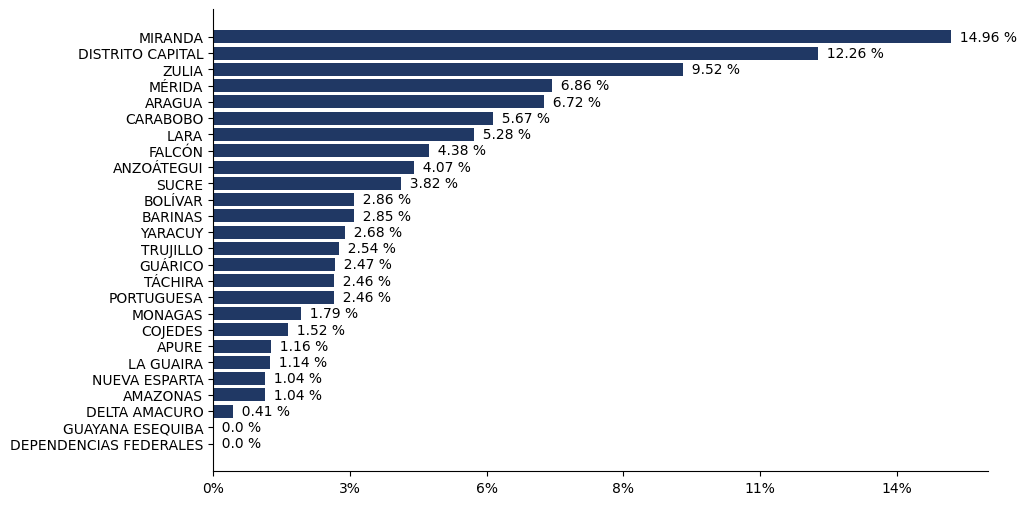

In [ ]:

import locale # Import the locale module
from matplotlib.ticker import FuncFormatter
# Supongamos que quieres hacer el gráfico de barras horizontales para la columna 'Estado'
columna_a_graficar = 'Estado'  # Reemplaza 'Nombre de la Columna' con el nombre de tu columna

# Contar la cantidad de valores repetidos y ordenarlos de forma descendente
conteo_valores = df[columna_a_graficar].value_counts().sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
bars = plt.barh(conteo_valores.index, conteo_valores.values, color='#203864')

# Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

locale.setlocale(locale.LC_ALL, '')  # Set locale based on your system settings

"""
# Formatear el eje horizontal para mostrar separadores de miles
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: locale.format_string("%d", int(x), grouping=True)))
"""

# Formatear el eje horizontal para mostrar porcentajes
#     Calcular el total para convertir a porcentaje
total = conteo_valores.sum()

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/total:.0%}'))

"""
# Agregar etiquetas de datos a cada barra con separadores de miles

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{locale.format_string("%d", width, grouping=True)}',
             ha='left', va='center')

"""
# Agregar etiquetas de datos a cada barra con porcentajes a cada barra
size=conteo_valores.values
i=0
for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2,
          f'  {round(size[i]/sum(size)*100, 2)} %',
          ha='left', va='center')
  i+=1

# Mostrar gráfico
plt.show()


Análisis del gráfico anterior

<ipython-input-6-7ead9393a810>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bars = plt.barh(value_counts.index, value_counts.values, color=plt.cm.get_cmap(colormap)(range(len(value_counts))))


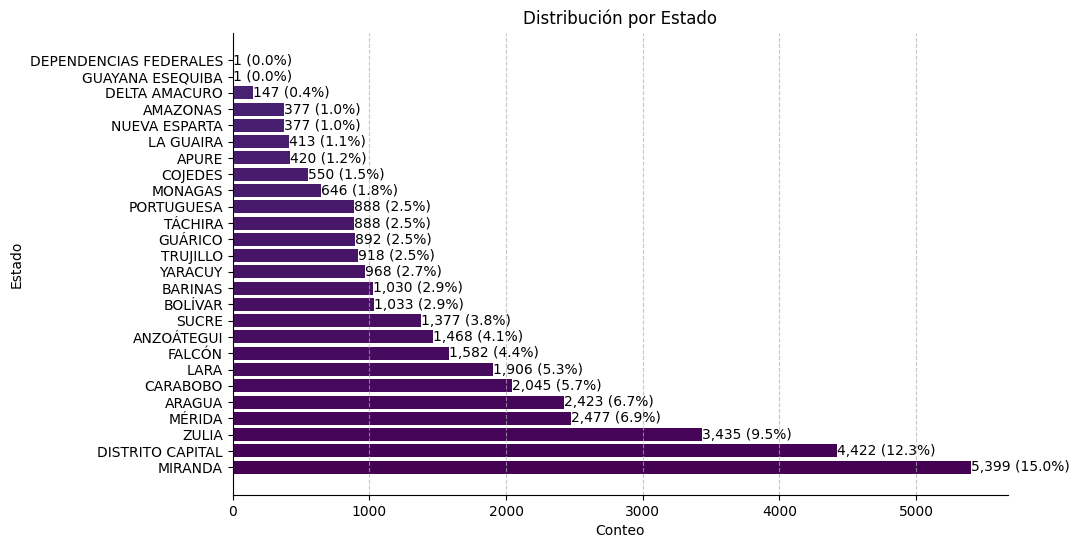

In [ ]:
import matplotlib.pyplot as plt
import locale

def plot_horizontal_bar_chart(df, column, title='', colormap='tab20b', figsize=(10, 6)):
    """
    Crea un gráfico de barras horizontales personalizado.

    Args:
        df: DataFrame de pandas.
        column: Nombre de la columna a graficar.
        title: Título del gráfico.
        colormap: Paleta de colores a utilizar.
        figsize: Tamaño de la figura.
    """

    # Contar y ordenar los valores
    value_counts = df[column].value_counts().sort_values(ascending=False)

    # Crear el gráfico
    plt.figure(figsize=figsize)
    bars = plt.barh(value_counts.index, value_counts.values, color=plt.cm.get_cmap(colormap)(range(len(value_counts))))

    # Personalizar el gráfico
    plt.title(title)
    plt.xlabel('Conteo')
    plt.ylabel(column)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Eliminar las líneas superior y derecha
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)

    # Agregar etiquetas de datos con formato de miles y porcentajes
    locale.setlocale(locale.LC_ALL, '')
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2,
                 f'{locale.format_string("%d", width, grouping=True)} ({value_counts.values[i] / value_counts.sum() * 100:.1f}%)',
                 ha='left', va='center')

    plt.show()

# Ejemplo de uso:
plot_horizontal_bar_chart(df, 'Estado', title='Distribución por Estado', colormap='viridis')

# 2. Distribución por sexos

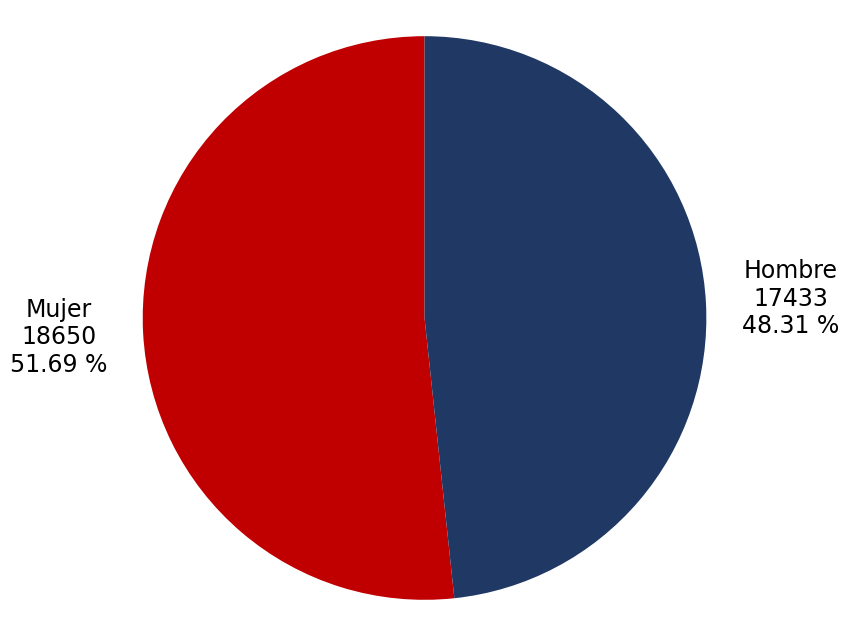

In [ ]:
# Hacer el gráfico de torta para la columna 'Sexo'

columna_a_graficar = 'Sexo'  # Reemplaza 'Nombre de la Columna' con el nombre de tu columna
colores= ['#c00000','#203864']

# 1. Contar la cantidad de valores repetidos
conteo_valores = df[columna_a_graficar].value_counts()

# 2. Creando el gráfico de torta con etiquetas y etiquetas de datos
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(conteo_valores.values,
                                  colors=colores,
                                  autopct='',
                                  startangle=90,
                                  textprops={'fontsize': 12})

# 3. La relación de aspecto uniforme garantiza que el gráfico circular se dibuje como un círculo.
ax.axis('equal')

# plt.title(f'Distribución de valores en la columna {columna_a_graficar}')

# 4. Asignando conteo_valores.values a sizes
sizes = conteo_valores.values

# 5. Añadiendo etiqueta de datos a cada porción
for i, label in enumerate(conteo_valores.index):
    # 5.1 Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # 5.2 Ajustar la distancia de las etiquetas al centro
    offset = 1.3  # Ajusta este valor para cambiar la distancia

    # 5.3 Crear la etiqueta con múltiples líneas
    ax.text(x * offset, y * offset, f"{label}\n{sizes[i]}\n{round(sizes[i]/sum(sizes)*100, 2)} %", ha='center', va='center', fontsize = 17)

# 6. Mostrar gráfico
plt.show()

Análisis del gráfico anterior

# 3. Distribución por grupo etario (Hacerlo por grupo etarios como el del excel y el OEL, además de un histograma con un ANOVA)

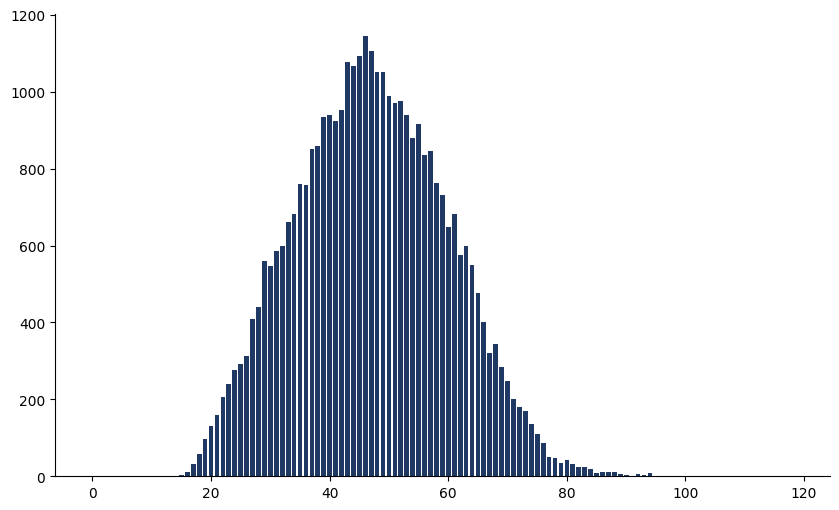

In [ ]:
# prompt: escribe un código que haga un gráfico de barras horizontales de una columna dentro de un dataframe y que me cuente la cantidad de los valores repetidos

# 1. Hacer el gráfico de barras horizontales para la columna '1. Indícanos tu rango de edad.'
column = 'Edad'

# 2. Contar la cantidad de valores repetidos y ordenarlos de forma descendente
conteo_valores = df[column].value_counts().sort_index()

# 3. Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
bars = plt.bar(conteo_valores.index, conteo_valores.values, color='#203864')

# 4. Eliminar las líneas superior y derecha
for spine in ['top', 'right']:
  plt.gca().spines[spine].set_visible(False)

"""
# 5. Agregar etiquetas de datos a cada barra con separadores de miles

for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2,
          f'{locale.format_string("%d", width, grouping=True)}',
          ha='left', va='center')


# 5. Agregar etiquetas de datos en porcentajes a cada barra
size=conteo_valores.values
i=0
for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2,
          f'  {round(size[i]/sum(size)*100, 2)} %',
          ha='left', va='center')
  i+=1
"""
# Mostrar el gráfico
plt.show()

In [ ]:

# Cargar los datos desde un archivo CSV

# df = pd.read_csv('ruta/a/tu/archivo.csv')  # Reemplaza con la ruta a tu archivo

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())
"""
# Visualizar la distribución de valores para cada columna numérica
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Visualizar la distribución de valores para cada columna categórica
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.show()
"""
# Identificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


"""
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
"""

Primeras filas del DataFrame:
   Nro Nacionalidad  Cedula de identidad Primer Nombre Segundo Nombre  \
0    1            V              6117283          RADY       VICTORIA   
1    2            V             13209798         MARIA      ALEJANDRA   
2    3            V              5977576          WIDO           JOSE   
3    4            V              9681910         Romny           Jose   
4    5            V             11727207      CELISBEY     DEL CARMEN   

  Primer Apellido Segundo Apellido  Edad    Sexo Estado Civil  ...  \
0        ESPINOZA              NaN    60   Mujer    SOLTERO/A  ...   
1         DUGARTE        DE JUAREZ    48   Mujer     CASADO/A  ...   
2        MARTINEZ            PEREZ    58   Mujer    SOLTERO/A  ...   
3          Yeguez             Mass    53  Hombre    SOLTERO/A  ...   
4         PEREIRA          CARDOZO    51   Mujer     CASADO/A  ...   

                                      Subarea      Curso Capacitacion  \
0           OTRAS ESPECIALIDADES SOCI

"\n# Matriz de correlación\nplt.figure(figsize=(12, 8))\ncorrelation_matrix = df.corr()\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Matriz de Correlación')\nplt.show()\n"

Análisis del gráfico anterior

# 4. Talento humano dedicado I+D (Cambiar código)

Análisis del gráfico anterior

# 5. Sector donde labora el personal en I+D

Análisis del gráfico anterior

# 6. Distribución por estudios o nivel académico (Mejorarlo como el excel)

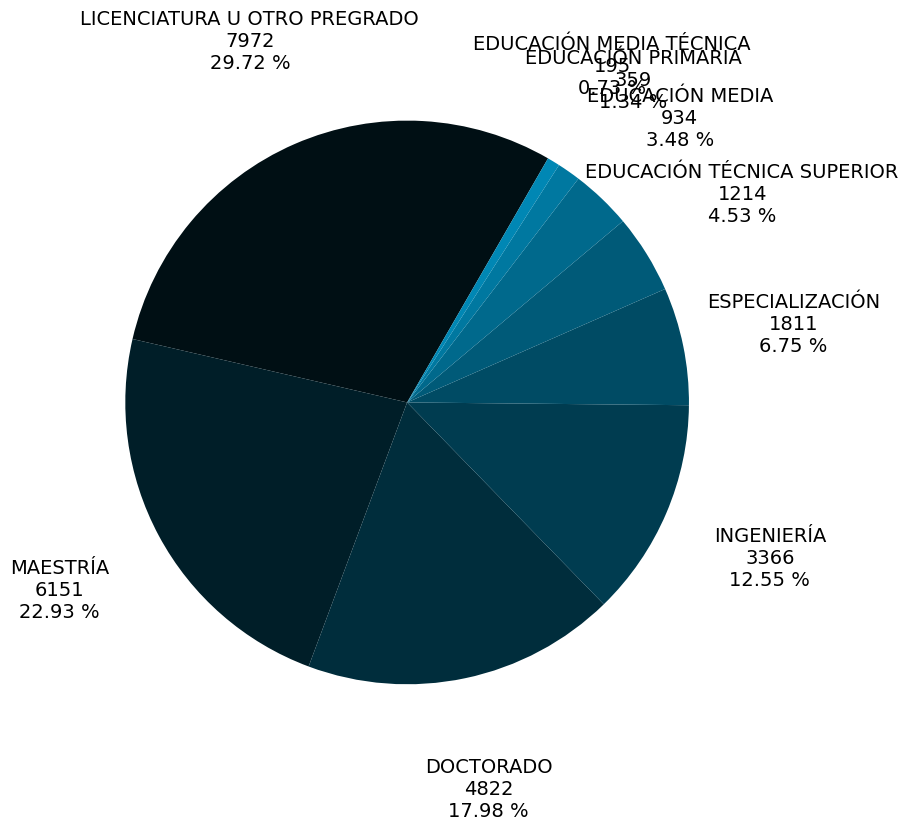

In [ ]:
from matplotlib import cm
from matplotlib import colors

# Hacer el gráfico de torta para la columna 'Sexo'

col = 'Nivel de Estudio'  # Reemplaza 'Nombre de la Columna' con el nombre de tu columna

# Función para generar colores degradados
def generate_gradient_colors(base_color, num_colors):
    base_color = np.array(base_color) / 255
    gradient = [base_color * (1 - (num_colors - i)/num_colors) for i in range(1, num_colors+1)]
    return gradient


# Generar colores degradados

religion = df[col].unique()

base_color = [0, 150, 200]

colores = generate_gradient_colors(base_color, len(religion))

# 1. Contar la cantidad de valores repetidos
conteo_valores = df[col].value_counts()

# 2. Creando el gráfico de torta con etiquetas y etiquetas de datos
fig, ax = plt.subplots(figsize=(8, 8))

# Eliminar el fondo blanco del gráfico
fig.patch.set_visible(False)
ax.patch.set_visible(False)

wedges, texts, autotexts = ax.pie(conteo_valores.values,
                                  colors=colores,
                                  autopct='',
                                  startangle=60,
                                  textprops={'fontsize': 12})

# 3. La relación de aspecto uniforme garantiza que el gráfico circular se dibuje como un círculo.
ax.axis('equal')

# plt.title(f'Distribución de valores en la columna {columna_a_graficar}')

# 4. Asignando conteo_valores.values a sizes
sizes = conteo_valores.values

# 5. Añadiendo etiqueta de datos a cada porción
for i, label in enumerate(conteo_valores.index):
    # 5.1 Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # 5.2 Ajustar la distancia de las etiquetas al centro
    offset = 1.4  # Ajusta este valor para cambiar la distancia

    # 5.3 Crear la etiqueta con múltiples líneas
    ax.text(x * offset, y * offset, f"{label}\n{sizes[i]}\n{round(sizes[i]/sum(sizes)*100, 2)} %", ha='center', va='center', fontsize = 14)

# 6. Mostrar gráfico
plt.show()

Análisis del gráfico anterior

# 7. Distribución por área de conocimiento

Análisis del gráfico anterior

# 8. Fecha de registros por nivel de estudios

Análisis del gráfico anterior

# 9. Fecha de registros por área de conocimientos

Análisis del gráfico anterior

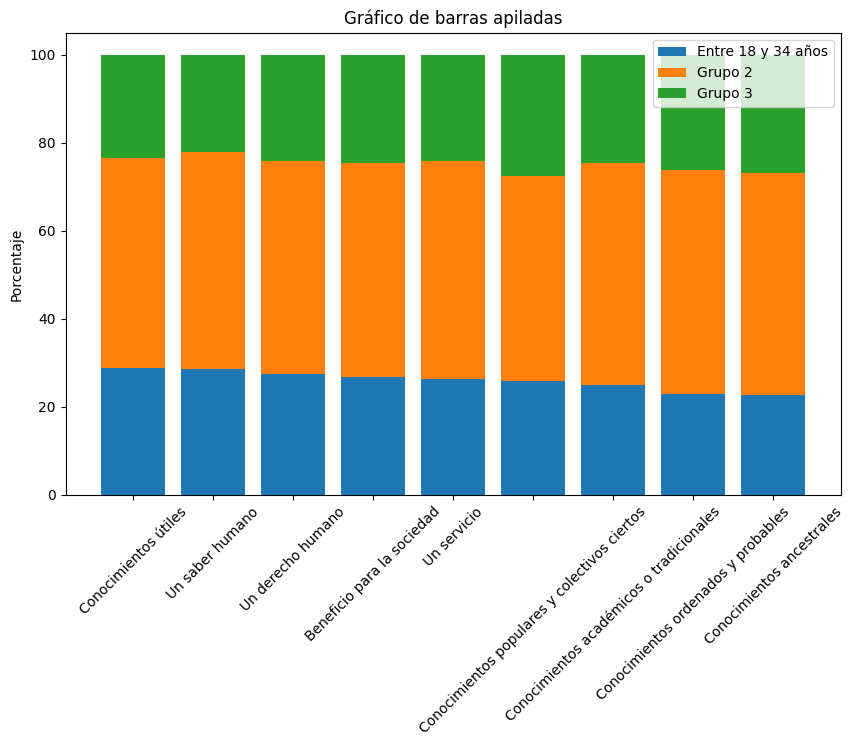

In [ ]:
# Datos de ejemplo (ajusta estos valores según tus datos reales)
categorias = ['Conocimientos útiles', 'Un saber humano', 'Un derecho humano', 'Beneficio para la sociedad',
              'Un servicio', 'Conocimientos populares y colectivos ciertos', 'Conocimientos académicos o tradicionales',
              'Conocimientos ordenados y probables', 'Conocimientos ancestrales']
datos = [[28.88, 47.77, 23.35],
         [28.68, 49.23, 22.09],
         [27.35, 48.52, 24.13],
         [26.82, 48.60, 24.57],
         [26.22, 49.68, 24.10],
         [25.78, 46.79, 27.43],
         [24.95, 50.56, 24.48],
         [22.84, 51.08, 26.09],
         [22.58, 50.50, 26.92]]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras apiladas
# Transpose datos so that its shape is (3, 9)
datos = np.array(datos).T.tolist()
for i in range(len(datos)):
    if i == 0:
        ax.bar(categorias, datos[i], label='Entre 18 y 34 años')
    else:
        ax.bar(categorias, datos[i], bottom=np.sum(datos[:i], axis=0), label=f'Grupo {i+1}')

# Personalizar el gráfico
ax.set_ylabel('Porcentaje')
ax.set_title('Gráfico de barras apiladas')
ax.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show()

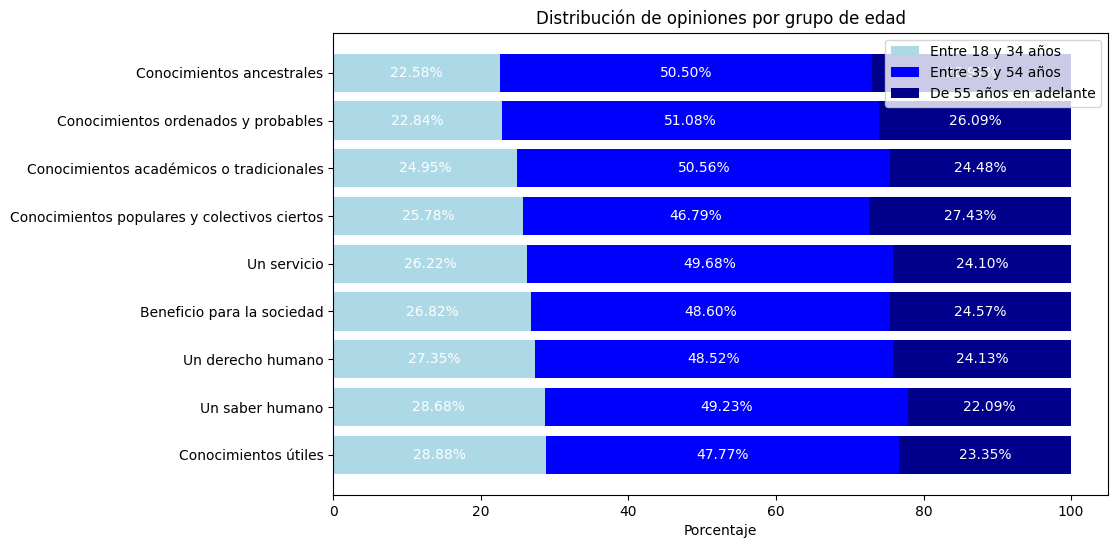

In [ ]:
# Datos de ejemplo (ajusta estos valores según tus datos reales)
categorias = ['Conocimientos útiles', 'Un saber humano', 'Un derecho humano',
              'Beneficio para la sociedad', 'Un servicio',
              'Conocimientos populares y colectivos ciertos',
              'Conocimientos académicos o tradicionales',
              'Conocimientos ordenados y probables', 'Conocimientos ancestrales']

datos = [[28.88, 47.77, 23.35],
         [28.68, 49.23, 22.09],
         [27.35, 48.52, 24.13],
         [26.82, 48.60, 24.57],
         [26.22, 49.68, 24.10],
         [25.78, 46.79, 27.43],
         [24.95, 50.56, 24.48],
         [22.84, 51.08, 26.09],
         [22.58, 50.50, 26.92]]

# Transpose datos to align values with categories
datos = np.array(datos).T

# Crear el gráfico de barras apiladas horizontales
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(categorias, datos[0], color='lightblue', label='Entre 18 y 34 años')
ax.barh(categorias, datos[1], left=datos[0], color='blue', label='Entre 35 y 54 años')
ax.barh(categorias, datos[2], left=np.array(datos[0]) + np.array(datos[1]), color='darkblue', label='De 55 años en adelante')

# Agregar etiquetas dentro de las barras
for i in range(len(categorias)):
    for j in range(len(datos)):
        ax.text(np.sum(datos[:j+1, i])-datos[j, i]/2, i, f"{datos[j,i]:.2f}%", ha='center', va='center', color='white')

# Personalizar el gráfico
ax.set_xlabel('Porcentaje')
ax.set_title('Distribución de opiniones por grupo de edad')
ax.legend()

plt.show()

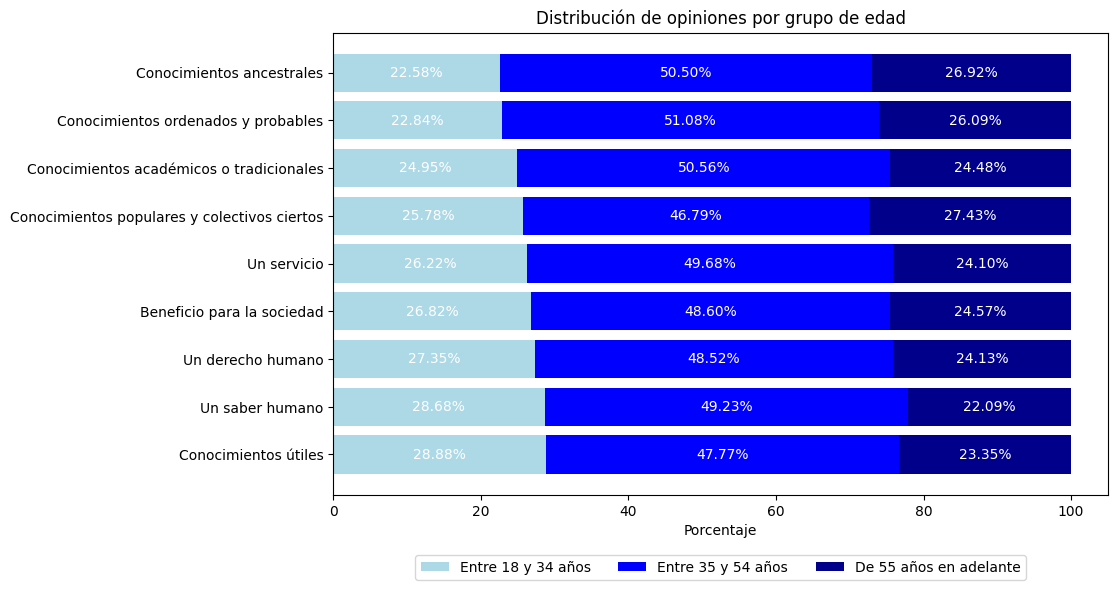

In [ ]:
# Datos de ejemplo (ajusta estos valores según tus datos reales)
categorias = ['Conocimientos útiles', 'Un saber humano', 'Un derecho humano',
              'Beneficio para la sociedad', 'Un servicio',
              'Conocimientos populares y colectivos ciertos',
              'Conocimientos académicos o tradicionales',
              'Conocimientos ordenados y probables', 'Conocimientos ancestrales']

datos = [[28.88, 47.77, 23.35],
         [28.68, 49.23, 22.09],
         [27.35, 48.52, 24.13],
         [26.82, 48.60, 24.57],
         [26.22, 49.68, 24.10],
         [25.78, 46.79, 27.43],
         [24.95, 50.56, 24.48],
         [22.84, 51.08, 26.09],
         [22.58, 50.50, 26.92]]

# Transpose the data so that its shape is compatible with categorias
datos = np.array(datos).T

# Crear el gráfico de barras apiladas horizontales
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(categorias, datos[0], color='lightblue', label='Entre 18 y 34 años')
ax.barh(categorias, datos[1], left=datos[0], color='blue', label='Entre 35 y 54 años')
ax.barh(categorias, datos[2], left=np.array(datos[0]) + np.array(datos[1]), color='darkblue', label='De 55 años en adelante')

# Agregar etiquetas dentro de las barras
for i in range(len(categorias)):
    for j in range(len(datos)):
        ax.text(np.sum(datos[:j+1, i])-datos[j, i]/2, i, f"{datos[j, i]:.2f}%", ha='center', va='center', color='white')

# Personalizar el gráfico
ax.set_xlabel('Porcentaje')
ax.set_title('Distribución de opiniones por grupo de edad')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.20), ncol=3)

plt.show()

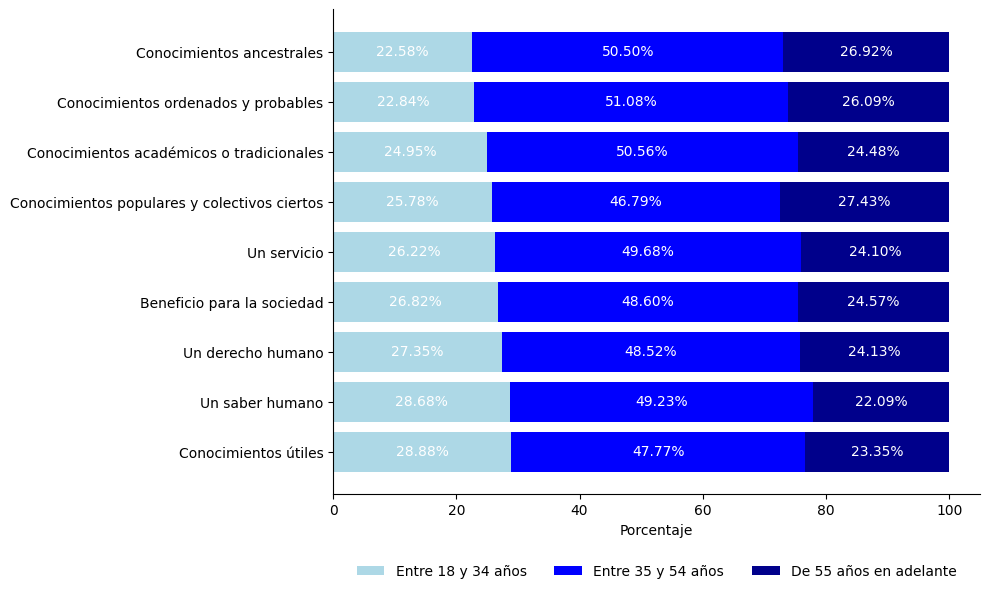

In [ ]:
# Datos de ejemplo (ajusta estos valores según tus datos reales)
categorias = ['Conocimientos útiles', 'Un saber humano', 'Un derecho humano',
              'Beneficio para la sociedad', 'Un servicio',
              'Conocimientos populares y colectivos ciertos',
              'Conocimientos académicos o tradicionales',
              'Conocimientos ordenados y probables', 'Conocimientos ancestrales']

datos = [[28.88, 47.77, 23.35],
         [28.68, 49.23, 22.09],
         [27.35, 48.52, 24.13],
         [26.82, 48.60, 24.57],
         [26.22, 49.68, 24.10],
         [25.78, 46.79, 27.43],
         [24.95, 50.56, 24.48],
         [22.84, 51.08, 26.09],
         [22.58, 50.50, 26.92]]

# Transpose the data so that its shape is compatible with categorias
datos = np.array(datos).T

# Crear el gráfico de barras apiladas horizontales
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(categorias, datos[0], color='lightblue', label='Entre 18 y 34 años')
ax.barh(categorias, datos[1], left=datos[0], color='blue', label='Entre 35 y 54 años')
ax.barh(categorias, datos[2], left=np.array(datos[0]) + np.array(datos[1]), color='darkblue', label='De 55 años en adelante')

# Agregar etiquetas dentro de las barras
for i in range(len(categorias)):
    for j in range(len(datos)):
        ax.text(np.sum(datos[:j+1, i])-datos[j, i]/2, i, f"{datos[j, i]:.2f}%", ha='center', va='center', color='white')

# Personalizar el gráfico
ax.set_xlabel('Porcentaje')
#ax.set_title('Distribución de opiniones por grupo de edad')
#ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.20), ncol=3)

# Eliminar las líneas de la caja del gráfico
#for spine in ax.spines.values():
#    spine.set_visible(False)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Eliminar la caja alrededor de la leyenda y hacerla transparente
legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.20), ncol=3)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

# Ajustar el espacio alrededor del gráfico
plt.tight_layout()


plt.show()